<a href="https://colab.research.google.com/github/bryandelgado99/Fundamentos-de-IA/blob/main/Ejercicio_KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio - Aprendizaje No Supervisado (Clustering)
## Fecha: 11/12/2023

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [36]:
#Leemos le archivo
data = pd.read_csv("/content/face.csv")

#Limpiamos valores nulos
datos = data.dropna()

#Reiniciamos el indice
datos = datos.reset_index(drop=True)

#Cracterísticas de los datos
print(data.describe())

       Unnamed: 0.1            x            y        color
count   1273.000000  1273.000000  1273.000000  1273.000000
mean     636.000000   183.323909   117.068835     0.747054
std      367.627756    57.234706    57.518379     1.006485
min        0.000000    81.135373     4.943902     0.000000
25%      318.000000   143.092947    72.213496     0.000000
50%      636.000000   177.060595   108.399710     0.000000
75%      954.000000   226.692160   160.324629     1.000000
max     1272.000000   304.175420   241.815846     3.000000


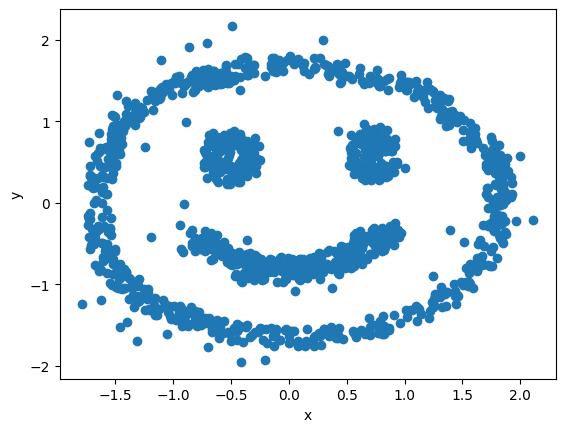

In [38]:
#Separamos las características relevantes
X=datos[['x', 'y']]

#Normalizamos los valores
X=(X-X.mean())/(X.std())

#Graficamos el modelo
plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

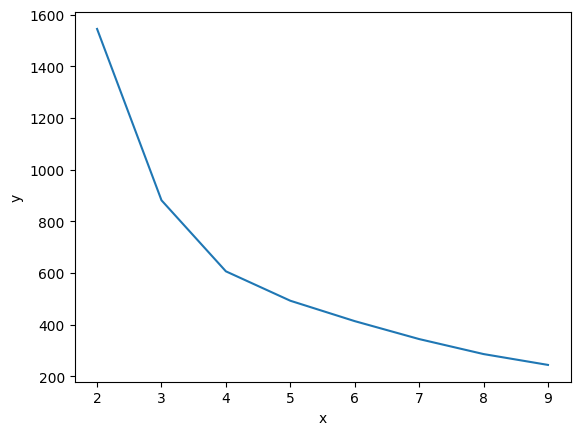

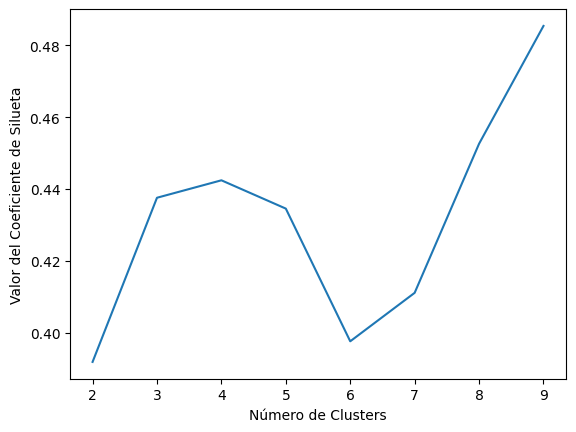

0.4424352628310784
0.43456225403706367


In [39]:
#Calcular la inercia del modelo
k_range = range(2,10)
inercias=[]
siluetas = []

for k in k_range:
  modelo = KMeans(k)
  modelo.fit(X)
  inercias.append(modelo.inertia_)
  #Calculamos la métrica de la silueta para diferentes valores del cluster
  silueta = silhouette_score(X, modelo.labels_)
  siluetas.append(silueta)

#Gráfica de la curva de codo
plt.plot(k_range, inercias) #(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("\n")

#Graficamos la silueta
plt.plot(k_range, siluetas) #(x,y)
plt.xlabel("Número de Clusters")
plt.ylabel("Valor del Coeficiente de Silueta")
plt.show()
print(siluetas[2])
print(siluetas[3])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


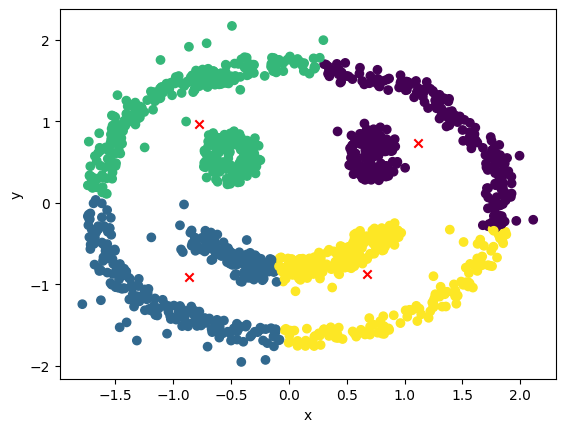

In [41]:
#Creamos el modelo
modelo = KMeans(4)
modelo.fit(X)

#Impresión del centroide
centroide = modelo.cluster_centers_
etiquetas = modelo.labels_

#Gráfico de disperción de clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=etiquetas, cmap='viridis')
plt.scatter(centroide[:,0], centroide[:,1], marker='x', color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [44]:
#Evaluación del modelo
silueta = silhouette_score(X, etiquetas)
calinski = calinski_harabasz_score(X, etiquetas)
davies = davies_bouldin_score(X, etiquetas)
print("Silueta:", silueta)
print("Calinski:", calinski)
print("Davies:", davies)

Silueta: 0.4424352628310784
Calinski: 1351.9549115549669
Davies: 0.7722225720679867


In [ ]:
#Describimos cada cluster


#Predicciones

In [45]:
'''Predicción 1'''

datos_nuevos = np.array([[14.37, 8]])
#Normalizar
datos_nuevos = (datos_nuevos-datos_nuevos.mean()/datos_nuevos.std())
prediccion = modelo.predict(datos_nuevos)
print(f"La predicción es {prediccion}")


La predicción es [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [46]:
'''Predicción 2'''

datos_nuevos = np.array([[5, 10]])
#Normalizar
datos_nuevos = (datos_nuevos-datos_nuevos.mean()/datos_nuevos.std())
prediccion = modelo.predict(datos_nuevos)
print(f"La predicción es {prediccion}")


La predicción es [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [49]:
'''Predicción 3'''

datos_nuevos = np.array([[3.2, 8.2]])
#Normalizar
datos_nuevos = (datos_nuevos-datos_nuevos.mean()/datos_nuevos.std())
prediccion = modelo.predict(datos_nuevos)
print(f"La predicción es {prediccion}")


La predicción es [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
